In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from tqdm import tqdm
from imageio import imread

Processing training data...


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_22544\379676906.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path)


Processing validation data...


Epoch 1: 100%|██████████| 100/100 [00:09<00:00, 10.37it/s]


Epoch 1 Loss: 0.9412


Epoch 2: 100%|██████████| 100/100 [00:04<00:00, 20.12it/s]


Epoch 2 Loss: 0.5089


Epoch 3: 100%|██████████| 100/100 [00:05<00:00, 19.61it/s]


Epoch 3 Loss: 0.5272


Epoch 4: 100%|██████████| 100/100 [00:05<00:00, 19.15it/s]


Epoch 4 Loss: 0.3924


Epoch 5: 100%|██████████| 100/100 [00:05<00:00, 17.60it/s]


Epoch 5 Loss: 0.4214


Epoch 6: 100%|██████████| 100/100 [00:04<00:00, 20.88it/s]


Epoch 6 Loss: 0.4332


Epoch 7: 100%|██████████| 100/100 [00:04<00:00, 20.22it/s]


Epoch 7 Loss: 0.3723


Epoch 8: 100%|██████████| 100/100 [00:05<00:00, 19.92it/s]


Epoch 8 Loss: 0.4138


Epoch 9: 100%|██████████| 100/100 [00:05<00:00, 19.96it/s]


Epoch 9 Loss: 0.3350


Epoch 10: 100%|██████████| 100/100 [00:05<00:00, 19.46it/s]


Epoch 10 Loss: 0.3866


Epoch 11: 100%|██████████| 100/100 [00:05<00:00, 19.96it/s]


Epoch 11 Loss: 0.3928


Epoch 12: 100%|██████████| 100/100 [00:04<00:00, 20.06it/s]


Epoch 12 Loss: 0.3911


Epoch 13: 100%|██████████| 100/100 [00:05<00:00, 19.32it/s]


Epoch 13 Loss: 0.3843


Epoch 14: 100%|██████████| 100/100 [00:04<00:00, 21.31it/s]


Epoch 14 Loss: 0.3716


Epoch 15: 100%|██████████| 100/100 [00:04<00:00, 21.18it/s]


Epoch 15 Loss: 0.4146


Epoch 16: 100%|██████████| 100/100 [00:04<00:00, 22.22it/s]


Epoch 16 Loss: 0.3942


Epoch 17: 100%|██████████| 100/100 [00:04<00:00, 21.66it/s]


Epoch 17 Loss: 0.3319


Epoch 18: 100%|██████████| 100/100 [00:04<00:00, 21.60it/s]


Epoch 18 Loss: 0.3876


Epoch 19: 100%|██████████| 100/100 [00:04<00:00, 21.61it/s]


Epoch 19 Loss: 0.3376


Epoch 20: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s]


Epoch 20 Loss: 0.3359


Evaluating k=1: 100%|██████████| 1000/1000 [00:19<00:00, 51.43it/s]


k=1 Accuracy: 0.7832


Evaluating k=2: 100%|██████████| 1000/1000 [00:19<00:00, 50.45it/s]


k=2 Accuracy: 0.8451


Evaluating k=3: 100%|██████████| 1000/1000 [00:18<00:00, 52.72it/s]


k=3 Accuracy: 0.8821


Evaluating k=4: 100%|██████████| 1000/1000 [00:19<00:00, 52.11it/s]


k=4 Accuracy: 0.8988


Evaluating k=5: 100%|██████████| 1000/1000 [00:19<00:00, 52.38it/s]


k=5 Accuracy: 0.9031


Evaluating k=6: 100%|██████████| 1000/1000 [00:19<00:00, 51.55it/s]


k=6 Accuracy: 0.9132


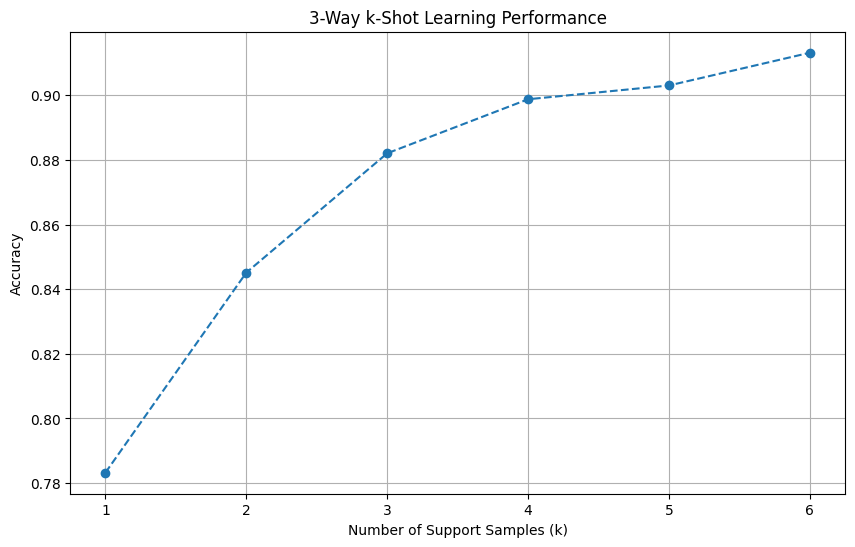

In [4]:
def load_and_process_data():
    data_path = r"D:\DATA\archive"
    train_folder = os.path.join(data_path, 'images_background')
    val_folder = os.path.join(data_path, 'images_evaluation')
    save_path = 'SN_fsl\data_saved'

    # Create data directory if not exists
    os.makedirs(data_path, exist_ok=True)
    os.makedirs(save_path, exist_ok=True)

    def loadimgs(path, n=0):
        if not os.path.exists(path):
            print(f"Unzipping {os.path.basename(path)}")
            os.chdir(data_path)
            os.system(f"unzip {os.path.basename(path)}.zip")
            os.chdir("..")
            
        X, y = [], []
        lang_dict = {}
        curr_y = n
        
        for alphabet in os.listdir(path):
            lang_dict[alphabet] = [curr_y, None]
            alphabet_path = os.path.join(path, alphabet)
            
            for letter in os.listdir(alphabet_path):
                letter_path = os.path.join(alphabet_path, letter)
                category_images = []
                
                for filename in os.listdir(letter_path):
                    image_path = os.path.join(letter_path, filename)
                    image = imread(image_path)
                    category_images.append(image)
                    y.append(curr_y)
                
                try:
                    X.append(np.stack(category_images))
                except ValueError as e:
                    print(f"Error loading {letter_path}: {e}")
                
                curr_y += 1
                lang_dict[alphabet][1] = curr_y - 1
        
        return np.stack(X), np.vstack(y), lang_dict

    # Load and save training data
    if not os.path.exists(os.path.join(save_path, "train.pickle")):
        print("Processing training data...")
        X_train, y_train, lang_train = loadimgs(train_folder)
        with open(os.path.join(save_path, "train.pickle"), "wb") as f:
            pickle.dump((X_train, lang_train), f)

    # Load and save validation data
    if not os.path.exists(os.path.join(save_path, "val.pickle")):
        print("Processing validation data...")
        X_val, y_val, lang_val = loadimgs(val_folder)
        with open(os.path.join(save_path, "val.pickle"), "wb") as f:
            pickle.dump((X_val, lang_val), f)

    # Load processed data
    with open(os.path.join(save_path, "train.pickle"), "rb") as f:
        X_train, lang_train = pickle.load(f)
    with open(os.path.join(save_path, "val.pickle"), "rb") as f:
        X_val, lang_val = pickle.load(f)

    # Preprocessing function
    def preprocess(images):
        images = 1.0 - images / 255.0  # Invert and normalize
        resized = np.zeros((images.shape[0], 28, 28))
        for i in range(images.shape[0]):
            resized[i] = tf.image.resize(images[i][..., None], (28, 28)).numpy().squeeze()
        return resized[..., None]  # Add channel dimension

    # Process datasets
    X_train = preprocess(X_train.reshape(-1, 105, 105))
    X_train = X_train.reshape(-1, 20, 28, 28, 1)
    X_val = preprocess(X_val.reshape(-1, 105, 105))
    X_val = X_val.reshape(-1, 20, 28, 28, 1)

    return X_train, X_val

# Load and preprocess data
X_train, X_val = load_and_process_data()

# ----------------------------
# Data Augmentation (Rotations)
# ----------------------------
def augment_with_rotations(data):
    rotated_data = []
    for char in data:
        for k in range(4):  # 0°, 90°, 180°, 270°
            rotated_char = np.rot90(char, k=k, axes=(1,2))
            rotated_data.append(rotated_char)
    return np.array(rotated_data)

X_train = augment_with_rotations(X_train)
X_val = augment_with_rotations(X_val)

# ----------------------------
# Model Architecture
# ----------------------------
def create_prototypical_net():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten()
    ])

encoder = create_prototypical_net()

# ----------------------------
# Training Setup
# ----------------------------
def generate_episode(dataset, n_way=3, k_shot=1, query_samples=15):
    classes = np.random.choice(len(dataset), n_way, replace=False)
    support, query = [], []
    s_labels, q_labels = [], []
    
    for class_idx, cls in enumerate(classes):
        samples = dataset[cls]
        max_samples = len(samples)
        
        # Ensure we don't request more samples than available
        query_samples_adj = min(query_samples, max_samples - k_shot)
        
        indices = np.random.choice(max_samples, k_shot + query_samples_adj, replace=False)
        
        support.extend(samples[indices[:k_shot]])
        query.extend(samples[indices[k_shot:k_shot+query_samples_adj]])
        
        s_labels.extend([class_idx] * k_shot)
        q_labels.extend([class_idx] * query_samples_adj)
        
    return (np.array(support), np.array(s_labels),
            np.array(query), np.array(q_labels))

optimizer = tf.keras.optimizers.Adam(1e-3)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# ----------------------------
# Training Loop
# ----------------------------
def train_step(support, s_labels, query, q_labels):
    with tf.GradientTape() as tape:
        support_emb = encoder(support)
        prototypes = tf.stack([tf.reduce_mean(support_emb[s_labels == i], axis=0) for i in range(3)])
        
        query_emb = encoder(query)
        logits = -tf.reduce_sum(tf.square(query_emb[:, None] - prototypes[None, :]), axis=-1)
        loss = loss_fn(q_labels, logits)
        
    grads = tape.gradient(loss, encoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables))
    return loss

epochs = 20
for epoch in range(epochs):
    epoch_loss = 0
    for _ in tqdm(range(100), desc=f"Epoch {epoch+1}"):
        k = np.random.randint(1, 7)
        # Use adjusted query_samples=14 to accommodate k=6
        support, s_labels, query, q_labels = generate_episode(
            X_train, 
            k_shot=k, 
            query_samples=14  # Allows k up to 6 (6+14=20)
        )
        loss = train_step(support, s_labels, query, q_labels)
        epoch_loss += loss.numpy()
    print(f"Epoch {epoch+1} Loss: {epoch_loss/100:.4f}")

# ----------------------------
# Evaluation
# ----------------------------
results = {}
for k in range(1, 7):
    accuracies = []
    for _ in tqdm(range(1000), desc=f"Evaluating k={k}"):
        # Use query_samples=5 for evaluation (k+5 <= 20)
        support, s_labels, query, q_labels = generate_episode(
            X_val, 
            k_shot=k, 
            query_samples=5
        )
        
        support_emb = encoder(support)
        prototypes = tf.stack([tf.reduce_mean(support_emb[s_labels == i], axis=0) for i in range(3)])
        
        query_emb = encoder(query)
        preds = tf.argmin(tf.norm(query_emb[:, None] - prototypes, axis=-1), axis=1)
        accuracies.append(tf.reduce_mean(tf.cast(preds == q_labels, tf.float32)).numpy())
    
    results[k] = np.mean(accuracies)
    print(f"k={k} Accuracy: {results[k]:.4f}")

# ----------------------------
# Visualization
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.title('3-Way k-Shot Learning Performance')
plt.xlabel('Number of Support Samples (k)')
plt.ylabel('Accuracy')
plt.xticks(list(results.keys()))
plt.grid(True)
plt.show()

In [6]:
def evaluate_k_shot(encoder, dataset, k_shot=1, n_way=3, query_samples=5, test_episodes=1000):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for _ in range(test_episodes):
        # Generate episode
        support, s_labels, query, q_labels = generate_episode(
            dataset, 
            k_shot=k_shot,
            n_way=n_way,
            query_samples=query_samples
        )
        
        # Get embeddings and prototypes
        support_emb = encoder(support)
        prototypes = tf.stack([tf.reduce_mean(support_emb[s_labels == i], axis=0) 
                              for i in range(n_way)])
        
        # Calculate distances and predictions
        query_emb = encoder(query)
        distances = tf.norm(query_emb[:, None] - prototypes, axis=-1)
        preds = tf.argmin(distances, axis=1).numpy()
        true_labels = q_labels
        
        # Initialize metrics storage
        tp = np.zeros(n_way)
        fp = np.zeros(n_way)
        fn = np.zeros(n_way)
        
        # Calculate per-class statistics
        for cls in range(n_way):
            tp[cls] = np.sum((preds == cls) & (true_labels == cls))
            fp[cls] = np.sum((preds == cls) & (true_labels != cls))
            fn[cls] = np.sum((true_labels == cls) & (preds != cls))
        
        # Calculate metrics with epsilon to avoid division by zero
        epsilon = 1e-7
        precision = np.mean([
            tp[cls] / (tp[cls] + fp[cls] + epsilon)
            for cls in range(n_way)
        ])
        recall = np.mean([
            tp[cls] / (tp[cls] + fn[cls] + epsilon)
            for cls in range(n_way)
        ])
        f1 = 2 * (precision * recall) / (precision + recall + epsilon)
        
        # Store metrics
        accuracies.append(np.mean(preds == true_labels))
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1': np.mean(f1_scores)
    }

# Updated evaluation section
print("\nEvaluating k-shot performance...")
results = {}
for k in range(1, 7):
    metrics = evaluate_k_shot(
        encoder, 
        X_val,
        k_shot=k,
        query_samples=5,
        test_episodes=1000
    )
    results[k] = metrics

# Display formatted results
print("\nFinal Evaluation Results:")
for k, metrics in results.items():
    print(f"k={k}:")
    print(f"  Accuracy:  {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1']:.4f}")
    print("----------------------")


Evaluating k-shot performance...

Final Evaluation Results:
k=1:
  Accuracy:  0.7779
  Precision: 0.8038
  Recall:    0.7779
  F1-Score:  0.7887
----------------------
k=2:
  Accuracy:  0.8513
  Precision: 0.8735
  Recall:    0.8513
  F1-Score:  0.8616
----------------------
k=3:
  Accuracy:  0.8759
  Precision: 0.8936
  Recall:    0.8759
  F1-Score:  0.8843
----------------------
k=4:
  Accuracy:  0.8896
  Precision: 0.9056
  Recall:    0.8896
  F1-Score:  0.8973
----------------------
k=5:
  Accuracy:  0.9005
  Precision: 0.9154
  Recall:    0.9005
  F1-Score:  0.9077
----------------------
k=6:
  Accuracy:  0.9081
  Precision: 0.9230
  Recall:    0.9081
  F1-Score:  0.9153
----------------------
